# EKSPLORASI DATA

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Sembunyikan semua warning
warnings.filterwarnings("ignore")

In [82]:
data = pd.read_csv("bread basket.csv")
print('dimensi data :',data.shape)
data.head()

dimensi data : (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


## mengubah tipe data

In [84]:
# format data waktu
data['date_time'] = pd.to_datetime(data['date_time'], format="%d-%m-%Y %H:%M")
data['date_time']

0       2016-10-30 09:58:00
1       2016-10-30 10:05:00
2       2016-10-30 10:05:00
3       2016-10-30 10:07:00
4       2016-10-30 10:07:00
                ...        
20502   2017-04-09 14:32:00
20503   2017-04-09 14:32:00
20504   2017-04-09 14:57:00
20505   2017-04-09 14:57:00
20506   2017-04-09 15:04:00
Name: date_time, Length: 20507, dtype: datetime64[ns]

## membuat kolom baru

In [85]:
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.weekday
data['hour'] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


## EDA

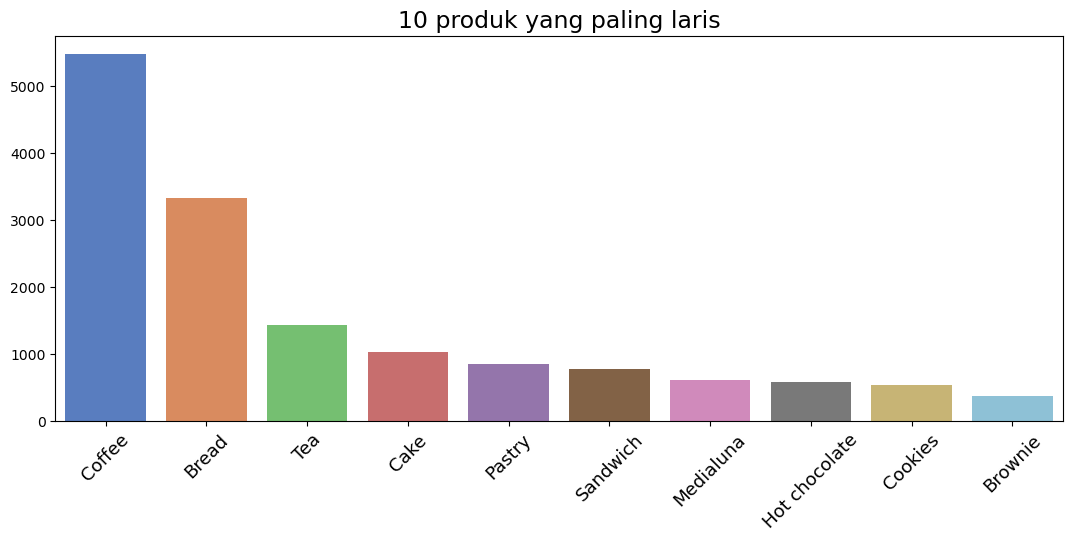

In [86]:
# menampilkan 10 item paling laris

plt.figure(figsize=(13,5))
sns.set_palette('muted')

sns.barplot(x = data['Item'].value_counts()[:10].index,
            y = data['Item'].value_counts()[:10].values)

plt.xlabel(''); plt.ylabel('')
plt.xticks(size =13, rotation =45)
plt.title('10 produk yang paling laris', size =17)
plt.show()

Text(0.5, 1.0, 'jumlah transaksi tiap bulan dari oktober - april')

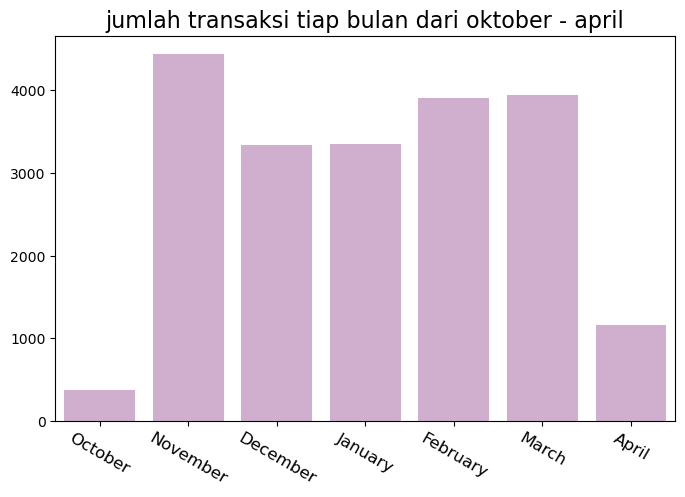

In [87]:
# transaksi tiap bulan

data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize=(8,5))
sns.barplot(
    x= ['October','November','December','January','February','March','April'],
    y = data_perbulan.values, color='#D5AAD3')

plt.xticks(size=12, rotation=-30)
plt.title('jumlah transaksi tiap bulan dari oktober - april', size=16)

Text(0.5, 1.0, 'Total transaksi per-hari dari oktober - april')

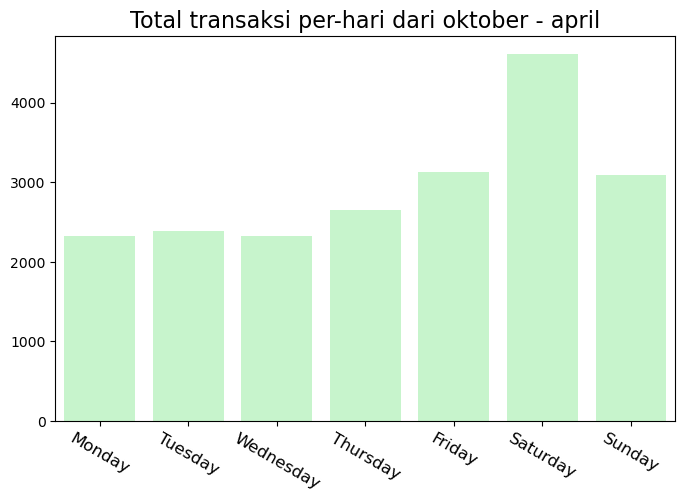

In [88]:
# transaksi harian
# transaksi tiap bulan

data_harian = data.groupby('day')['Transaction'].count()

plt.figure(figsize=(8,5))
sns.barplot(
    x= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    y = data_harian.values, color='#BFFCC6')

plt.xticks(size=12, rotation=-30)
plt.title('Total transaksi per-hari dari oktober - april', size=16)

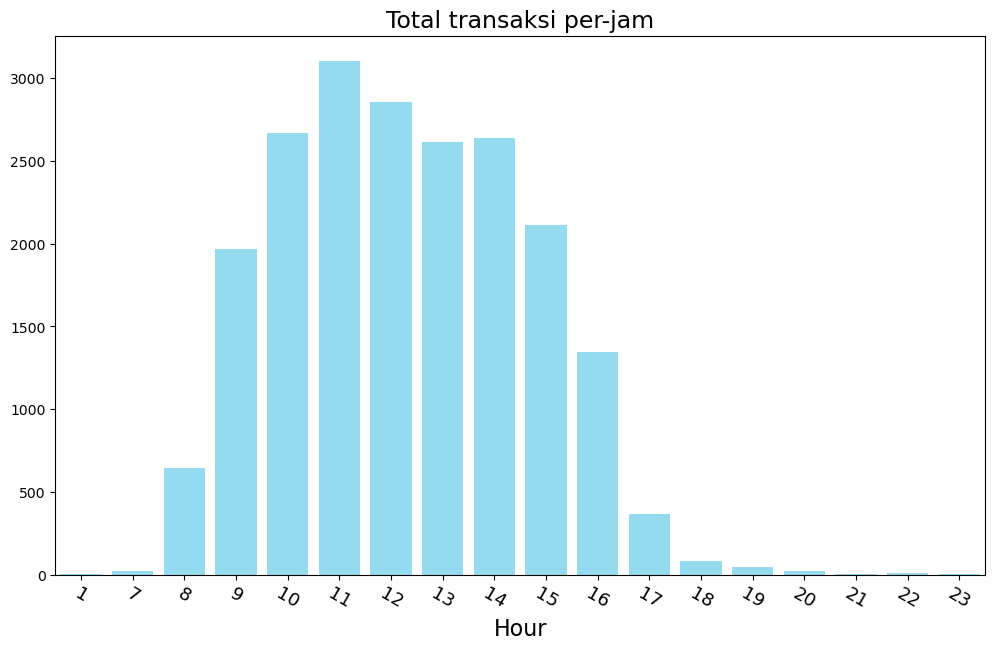

In [89]:
# pembelian tiap jam

# transaksi harian
# transaksi tiap bulan

data_perjam = data.groupby('hour')['Transaction'].count()

plt.figure(figsize=(12,7))
sns.barplot(
    x= data_perjam.index,
    y = data_perjam.values, color='#85E3FF')

plt.xlabel('Hour', size=16)
plt.xticks(size=13, rotation=-30)
plt.title('Total transaksi per-jam', size=17)
plt.show()

# DATA PREPARATION


In [90]:
# mengubah semua nilai dalam kolom 'Item' menjadi huruf kecil
data['Item'] = data['Item'].apply(lambda item: item.lower())

In [91]:
# menghapus spasi kosong di awal dan akhir dari setiap nilai dalam kolom 'Item'
data['Item'] = data['Item'].apply(lambda item: item.strip())

In [92]:
data = data[['Transaction','Item']].copy()
data.head()

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam


# MACHINE LEARNING

In [93]:
# import library
from mlxtend.frequent_patterns import association_rules, apriori

In [94]:
# buat fungsi
item_count = data.groupby(['Transaction','Item'])['Item'].count().reset_index(name='Count')
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


## insight
transaksi pertama bread count ada 1
transaksi yang ke 3 dia beli cookies, hot chocolate sama jam

jadi intinya data diatas bisa melihat seluruh transaksi

## buat pivot table

In [95]:
# bentuk dalam pivot table
item_count_pivot = item_count.pivot_table(index='Transaction',columns='Item',values='Count', aggfunc='sum').fillna(0)
print(' Ukuran dataset :', item_count_pivot.shape)
item_count_pivot.head()


 Ukuran dataset : (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# menghilangkan koma nya
item_count_pivot = item_count_pivot.astype('int32')
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## encoding


In [97]:
def encode(x):
    if x <= 0:
        return 0
    elif x > 0:
        return 1
item_count_pivot = item_count_pivot.apply(lambda col: col.map(encode))
item_count_pivot.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
print('Ukuran dataset :', item_count_pivot.shape)
print('Jumlah Transaksi :', item_count_pivot.shape[0])
print('Jumlah Items :', item_count_pivot.shape[1])

Ukuran dataset : (9465, 94)
Jumlah Transaksi : 9465
Jumlah Items : 94


## insight

jadi dibuat pivot tabel dulu itu agar data transaksinya dikelompokkan 
sebelumnya kan terpisah baris transaksi 3 nya ada 3 baris....nah ini sudah jadi 1
maka akan lebih gampang untuk mengidentifikasi junmlah transaksi

## algoritma

In [99]:
# menentukan nilai support / filter
# disini suportnya 1% saja biar muncul banyak

# Support adalah persentase dari jumlah transaksi yang mengandung itemset tersebut terhadap total jumlah transaksi dalam dataset.


support = 0.01
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values('support',ascending=False).head(20)

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(cake, coffee)"


## insight

- coffe itu nilainya 0.04
- bread dan coffe itu o.09

itemsets: Ini adalah kombinasi item atau itemset yang sering muncul dalam dataset. Misalnya, (coffee) berarti item "coffee" muncul sendiri dalam transaksi. Sedangkan (coffee, bread) berarti kombinasi item "coffee" dan "bread" muncul bersama-sama dalam transaksi.

Itemset (coffee, bread) muncul dalam 9.0016% dari transaksi, yang berarti kombinasi membeli "coffee" dan "bread" bersama-sama dalam transaksi tersebut muncul dalam 9.0016% dari total transaksi dalam dataset.

## metrik

In [100]:
# lift ratio
metric = 'lift'
min_threshold = 1

rules = association_rules(frequent_items, metric= metric, min_threshold=min_threshold)[['antecedents','consequents','support','confidence','lift']]

rules.sort_values('confidence', ascending= False, inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
31,(toast),(coffee),0.023666,0.704403,1.472431
28,(spanish brunch),(coffee),0.010882,0.598837,1.251766
18,(medialuna),(coffee),0.035182,0.569231,1.189878
23,(pastry),(coffee),0.047544,0.552147,1.154168
0,(alfajores),(coffee),0.019651,0.540698,1.130235
17,(juice),(coffee),0.020602,0.534247,1.116750
24,(sandwich),(coffee),0.038246,0.532353,1.112792
6,(cake),(coffee),0.054728,0.526958,1.101515
27,(scone),(coffee),0.018067,0.522936,1.093107
12,(cookies),(coffee),0.028209,0.518447,1.083723


## insight
- 31 = jika membeli toast maka membeli coffe nilai support sekian, confidence sekian dan lift sekian
- 25 = jika membeli sandwich maka membeli coffe nilai support sekian, confidence sekian dan lift sekian

algoritma ini bisa di implementasikan